In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import glob 
import utils

In [2]:
csv_ = '/data/kevin/csv/csv_npy/ds_dwi1500_npy.csv'
tabular_data = pd.read_csv(csv_)
print(tabular_data.head())

   patient_id                                      npy_path     gs  \
0       16092  /cache/kevin/ds_dwi1500_npy/000000016092.npy   GS_6   
1       27877  /cache/kevin/ds_dwi1500_npy/000000027877.npy  GS_7b   
2       27766  /cache/kevin/ds_dwi1500_npy/000000027766.npy   GS_0   
3       22792  /cache/kevin/ds_dwi1500_npy/000000022792.npy  GS_7a   
4       10789  /cache/kevin/ds_dwi1500_npy/000000010789.npy   GS_9   

                class  biopsy  labels_bi        granularity  labels_4class  \
0              cancer   False          0               GGG1              0   
1  cancer+prostatitis    True          1  prostatitis+GGG>1              1   
2         prostatitis   False          0        prostatitis              2   
3  cancer+prostatitis    True          1  prostatitis+GGG>1              1   
4              cancer    True          1              GGG>1              1   

   fold_bi  fold_4class  
0       -1            3  
1        1            3  
2        1           -1  
3     

In [3]:
print(tabular_data.columns)

Index(['patient_id', 'npy_path', 'gs', 'class', 'biopsy', 'labels_bi',
       'granularity', 'labels_4class', 'fold_bi', 'fold_4class'],
      dtype='object')


## Reformat Data Frame

- Drop column: 'granularity' / 'labels_4class' / 'fold_bi' / 'fold_4class' 
- Rename 'labels_bi'=>'maglinant'

In [4]:
tabular_data.drop(columns=['granularity', 'labels_4class', 'fold_bi', 'fold_4class'], axis=1, inplace=True)
tabular_data.rename(columns={"labels_bi": "maglinant"}, inplace=True)
print(tabular_data.head())

   patient_id                                      npy_path     gs  \
0       16092  /cache/kevin/ds_dwi1500_npy/000000016092.npy   GS_6   
1       27877  /cache/kevin/ds_dwi1500_npy/000000027877.npy  GS_7b   
2       27766  /cache/kevin/ds_dwi1500_npy/000000027766.npy   GS_0   
3       22792  /cache/kevin/ds_dwi1500_npy/000000022792.npy  GS_7a   
4       10789  /cache/kevin/ds_dwi1500_npy/000000010789.npy   GS_9   

                class  biopsy  maglinant  
0              cancer   False          0  
1  cancer+prostatitis    True          1  
2         prostatitis   False          0  
3  cancer+prostatitis    True          1  
4              cancer    True          1  


# Prostatitis Labels

For class with "cancer+prostatitis" or "prostatitis" => 1, else =>0

In [5]:
print(np.unique(tabular_data['class']))

['cancer' 'cancer+prostatitis' 'prostatitis' 'tumour-free']


Total number:  [1292  581]


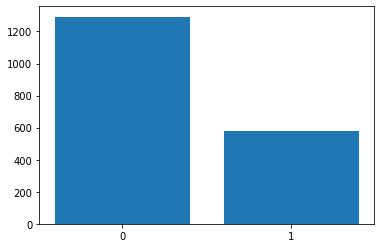

In [6]:
class_ = np.array(tabular_data['class'])
prostatitis = np.where((class_=="cancer+prostatitis")|(class_=='prostatitis'),1, 0)

val, count = np.unique(prostatitis, return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()

# Gleason Score

'gs_0' => 0, 'gs_6'=> 1, 'gs_7a'=>2, 'gs_7b'=>3, 'gs_8'=>4, 'gs_9'+'gs_10'=>5

In [7]:
gs = tabular_data['gs']
print(np.unique(gs))

['GS_0' 'GS_10' 'GS_6' 'GS_7a' 'GS_7b' 'GS_8' 'GS_9']


Total number:  [765 314 357 181  89 167]


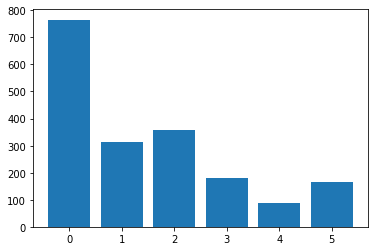

In [8]:
# convert to ggg 
ggg = []
for k in gs:
    if k=='GS_0':
        ggg.append(0)
    if k=='GS_6':
        ggg.append(1)
    if k=='GS_7a':
        ggg.append(2)
    if k=='GS_7b':
        ggg.append(3)
    if k=='GS_8':
        ggg.append(4)
    if k=='GS_9' or k=='GS_10':
        ggg.append(5)

val, count = np.unique(ggg, return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()

# Risk Group 

'no'=> 0, 'low' => 1, 'mid'=> 2, 'high' => 3

Total number:  [765 314 538 256]


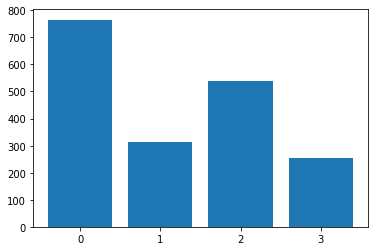

In [9]:
risk = []
for k in gs:
    if k=='GS_0':
        risk.append(0)
    if k=='GS_6':
        risk.append(1)
    if k=='GS_7a' or k=='GS_7b':
        risk.append(2)
    if k=='GS_8'or k=='GS_9' or k=='GS_10':
        risk.append(3)
        
val, count = np.unique(risk, return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()

# Clinial Significance GGG

'GS_0'=> 0, 'GS_6'/'GGG1' =>1, 'GS_7a,7b,8,9,10'/'GGG>1'=>2 

Total number:  [765 314 794]


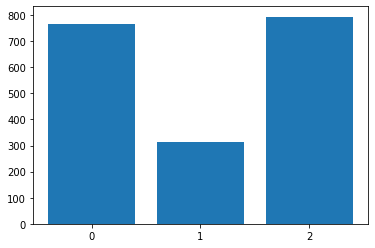

1873


In [10]:
ggg_s = []
for k in gs:
    if k=='GS_0':
        ggg_s.append(0)
    if k=='GS_6':
        ggg_s.append(1)
    if k=='GS_7a' or k=='GS_7b' or k=='GS_8'or k=='GS_9' or k=='GS_10':
        ggg_s.append(2)
        
val, count = np.unique(ggg_s, return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()
print(np.sum(count))

# Tumour/No-tumour

Total number:  [ 765 1108]


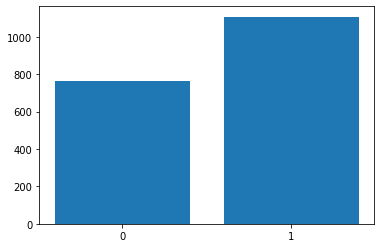

1873


In [11]:
tumour = []
for k in gs:
    if k=='GS_0':
        tumour.append(0)
    if k=='GS_6' or k=='GS_7a' or k=='GS_7b' or k=='GS_8'or k=='GS_9' or k=='GS_10':
        tumour.append(1)
        
val, count = np.unique(tumour, return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()
print(np.sum(count))

# Labels Combination

## 12 class

|  | Prostatitis | Maglinant | GGG | Label|
| --- | --- | --- |---|---|
| Healthy | 0 | 0 | 0 | 0|
| Prostate | 1 | 0 | 0 | 1|
|Prostate + GGG1|1|0|1|2|
|Prostate + GGG2|1|1|2|3|
|Prostate + GGG3|1|1|3|4|
|Prostate + GGG4|1|1|4|5|
|Prostate + GGG5|1|1|5|6|
|GGG1|0|0|1|7|
|GGG2|0|1|2|8|
|GGG3|0|1|3|9|
|GGG4|0|1|4|10|
|GGG5|0|1|5|11|


## 8 class

| | Prostatitis | Maglinant | Risk | Label|
| --- | --- | --- |---|---|
| Healthy | 0 | 0 | 0 | 0|
| Prostate | 1 | 0 | 0 | 1|
|Prostate + GGG1|1|0|1|2|
|Prostate + GGG2|1|1|2|3|
|Prostate + GGG3|1|1|2|3|
|Prostate + GGG4|1|1|3|4|
|Prostate + GGG5|1|1|3|4|
|GGG1|0|0|1|5|
|GGG2|0|1|2|6|
|GGG3|0|1|2|6|
|GGG4|0|1|3|7|
|GGG5|0|1|3|7|


## 6 class(ggg)

|  | Prostatitis | Maglinant | GGG | Label|
| --- | --- | --- |---|---|
| Healthy | 0 | 0 | 0 | 0|
| Prostate | 1 | 0 | 0 | 1|
|Prostate + GGG1|1|0|1|2|
|Prostate + GGG>1|1|1|2|3|
|GGG1|0|0|1|4|
|GGG>1|0|1|2|5|


### 6 Class(tumour)

|  | Prostatitis | Maglinant | Tumour | Label|
| --- | --- | --- |---|---|
| Healthy | 0 | 0 | 0 | 0|
| Prostate | 1 | 0 | 0 | 1|
|Prostate + GGG1|1|0|1|2|
|Prostate + GGG>1|1|1|1|3|
|GGG1|0|0|1|4|
|GGG>1|0|1|1|5|


In [13]:
tabular_data["prostatitis"]=prostatitis
tabular_data["ggg"]=ggg
tabular_data["risk"]=risk
tabular_data["ggg_s"]=ggg_s
tabular_data["tumour"]= tumour
print(tabular_data.head())

   patient_id                                      npy_path     gs  \
0       16092  /cache/kevin/ds_dwi1500_npy/000000016092.npy   GS_6   
1       27877  /cache/kevin/ds_dwi1500_npy/000000027877.npy  GS_7b   
2       27766  /cache/kevin/ds_dwi1500_npy/000000027766.npy   GS_0   
3       22792  /cache/kevin/ds_dwi1500_npy/000000022792.npy  GS_7a   
4       10789  /cache/kevin/ds_dwi1500_npy/000000010789.npy   GS_9   

                class  biopsy  maglinant  prostatitis  ggg  risk  ggg_s  \
0              cancer   False          0            0    1     1      1   
1  cancer+prostatitis    True          1            1    3     2      2   
2         prostatitis   False          0            1    0     0      0   
3  cancer+prostatitis    True          1            1    2     2      2   
4              cancer    True          1            0    5     3      2   

   tumour  
0       1  
1       1  
2       0  
3       1  
4       1  


# 12 Class

Total number:  [410 355  84  79  36  12  15 230 278 145  77 152]


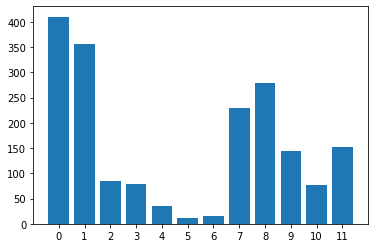

1873


In [14]:
labels_12 = []
for i in range(len(tabular_data["prostatitis"])):
    # healthy => 0
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==0 and tabular_data["ggg"][i]==0:
        labels_12.append(0)
    # prostatitis => 1
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==0 and tabular_data["ggg"][i]==0:
        labels_12.append(1)
    # prostatitis+ggg1 => 2
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==0 and tabular_data["ggg"][i]==1:
        labels_12.append(2)
    # prostatitis+ggg2 => 3
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==1 and tabular_data["ggg"][i]==2:
        labels_12.append(3)
    # prostatitis+ggg3 => 4
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==1 and tabular_data["ggg"][i]==3:
        labels_12.append(4)
    # prostatitis+ggg4 => 5
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==1 and tabular_data["ggg"][i]==4:
        labels_12.append(5)
    # prostatitis+ggg5 => 6
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==1 and tabular_data["ggg"][i]==5:
        labels_12.append(6)
    # ggg1 => 7
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==0 and tabular_data["ggg"][i]==1:
        labels_12.append(7)
    # ggg2 => 8
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==1 and tabular_data["ggg"][i]==2:
        labels_12.append(8)
    # ggg3 => 9
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==1 and tabular_data["ggg"][i]==3:
        labels_12.append(9)
    # ggg4 => 10
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==1 and tabular_data["ggg"][i]==4:
        labels_12.append(10)
    # ggg5 => 11
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==1 and tabular_data["ggg"][i]==5:
        labels_12.append(11)

val, count = np.unique(labels_12, return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

# 8 Class

Total number:  [410 355  84 115  27 230 423 229]


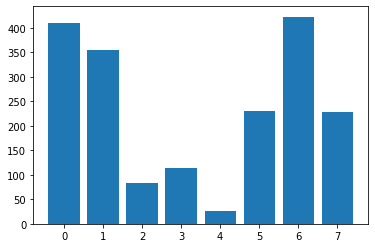

1873


In [15]:
labels_8 = []
for i in range(len(tabular_data["prostatitis"])):
    # healthy => 0
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==0 and tabular_data["risk"][i]==0:
        labels_8.append(0)
    # prostatitis => 1
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==0 and tabular_data["risk"][i]==0:
        labels_8.append(1)
    # prostatitis+ggg1 => 2
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==0 and tabular_data["risk"][i]==1:
        labels_8.append(2)
    # prostatitis+ggg2/ggg3 => 3
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==1 and tabular_data["risk"][i]==2:
        labels_8.append(3)
    # prostatitis+ggg4/ggg5 => 4
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==1 and tabular_data["risk"][i]==3:
        labels_8.append(4)
    # ggg1 => 5
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==0 and tabular_data["risk"][i]==1:
        labels_8.append(5)
    # ggg2/ggg3 => 6
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==1 and tabular_data["risk"][i]==2:
        labels_8.append(6)
    # ggg4/ggg5 => 7
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==1 and tabular_data["risk"][i]==3:
        labels_8.append(7)

val, count = np.unique(labels_8, return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

# 6 Class(ggg)

Total number:  [410 355  84 142 230 652]


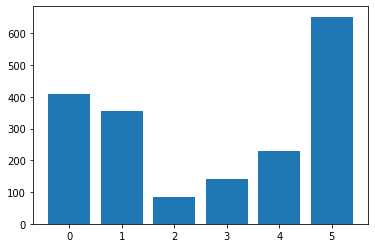

1873


In [16]:
labels_6 = []
for i in range(len(tabular_data["prostatitis"])):
    # healthy => 0
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==0 and tabular_data["ggg_s"][i]==0:
        labels_6.append(0)
    # prostatitis => 1
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==0 and tabular_data["ggg_s"][i]==0:
        labels_6.append(1)
    # prostatitis+ggg1 => 2
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==0 and tabular_data["ggg_s"][i]==1:
        labels_6.append(2)
    # prostatitis+ggg>1 => 3
    if tabular_data["prostatitis"][i]==1 and tabular_data["maglinant"][i]==1 and tabular_data["ggg_s"][i]==2:
        labels_6.append(3)
    # ggg1 => 4
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==0 and tabular_data["ggg_s"][i]==1:
        labels_6.append(4)
    # ggg>1 => 5
    if tabular_data["prostatitis"][i]==0 and tabular_data["maglinant"][i]==1 and tabular_data["ggg_s"][i]==2:
        labels_6.append(5)

val, count = np.unique(labels_6, return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

In [17]:
tabular_data["labels_12"]=labels_12
tabular_data["labels_8"]=labels_8
tabular_data["labels_6"]=labels_6
print(tabular_data.head())

   patient_id                                      npy_path     gs  \
0       16092  /cache/kevin/ds_dwi1500_npy/000000016092.npy   GS_6   
1       27877  /cache/kevin/ds_dwi1500_npy/000000027877.npy  GS_7b   
2       27766  /cache/kevin/ds_dwi1500_npy/000000027766.npy   GS_0   
3       22792  /cache/kevin/ds_dwi1500_npy/000000022792.npy  GS_7a   
4       10789  /cache/kevin/ds_dwi1500_npy/000000010789.npy   GS_9   

                class  biopsy  maglinant  prostatitis  ggg  risk  ggg_s  \
0              cancer   False          0            0    1     1      1   
1  cancer+prostatitis    True          1            1    3     2      2   
2         prostatitis   False          0            1    0     0      0   
3  cancer+prostatitis    True          1            1    2     2      2   
4              cancer    True          1            0    5     3      2   

   tumour  labels_12  labels_8  labels_6  
0       1          7         5         4  
1       1          4         3         3  

# Create New CSV

In [18]:
new_csv = '/data/kevin/csv/csv_npy/multihead_ds_dwi1500_npy.csv'
tabular_data.to_csv(new_csv, index=False)
# load and comfirm 
df = pd.read_csv(new_csv)
print(df.head())

   patient_id                                      npy_path     gs  \
0       16092  /cache/kevin/ds_dwi1500_npy/000000016092.npy   GS_6   
1       27877  /cache/kevin/ds_dwi1500_npy/000000027877.npy  GS_7b   
2       27766  /cache/kevin/ds_dwi1500_npy/000000027766.npy   GS_0   
3       22792  /cache/kevin/ds_dwi1500_npy/000000022792.npy  GS_7a   
4       10789  /cache/kevin/ds_dwi1500_npy/000000010789.npy   GS_9   

                class  biopsy  maglinant  prostatitis  ggg  risk  ggg_s  \
0              cancer   False          0            0    1     1      1   
1  cancer+prostatitis    True          1            1    3     2      2   
2         prostatitis   False          0            1    0     0      0   
3  cancer+prostatitis    True          1            1    2     2      2   
4              cancer    True          1            0    5     3      2   

   tumour  labels_12  labels_8  labels_6  
0       1          7         5         4  
1       1          4         3         3  

# Split Fold 

### Class 12

In [19]:
utils.new_fold_col(new_csv, "fold_12", label_col="labels_12")
df = pd.read_csv(new_csv)
print(df.head())

   patient_id                                      npy_path     gs  \
0       16092  /cache/kevin/ds_dwi1500_npy/000000016092.npy   GS_6   
1       27877  /cache/kevin/ds_dwi1500_npy/000000027877.npy  GS_7b   
2       27766  /cache/kevin/ds_dwi1500_npy/000000027766.npy   GS_0   
3       22792  /cache/kevin/ds_dwi1500_npy/000000022792.npy  GS_7a   
4       10789  /cache/kevin/ds_dwi1500_npy/000000010789.npy   GS_9   

                class  biopsy  maglinant  prostatitis  ggg  risk  ggg_s  \
0              cancer   False          0            0    1     1      1   
1  cancer+prostatitis    True          1            1    3     2      2   
2         prostatitis   False          0            1    0     0      0   
3  cancer+prostatitis    True          1            1    2     2      2   
4              cancer    True          1            0    5     3      2   

   tumour  labels_12  labels_8  labels_6  fold_12  
0       1          7         5         4        3  
1       1          4    

### Class 8

In [20]:
utils.new_fold_col(new_csv, "fold_8", label_col="labels_8")
df = pd.read_csv(new_csv)
print(df.head())

   patient_id                                      npy_path     gs  \
0       16092  /cache/kevin/ds_dwi1500_npy/000000016092.npy   GS_6   
1       27877  /cache/kevin/ds_dwi1500_npy/000000027877.npy  GS_7b   
2       27766  /cache/kevin/ds_dwi1500_npy/000000027766.npy   GS_0   
3       22792  /cache/kevin/ds_dwi1500_npy/000000022792.npy  GS_7a   
4       10789  /cache/kevin/ds_dwi1500_npy/000000010789.npy   GS_9   

                class  biopsy  maglinant  prostatitis  ggg  risk  ggg_s  \
0              cancer   False          0            0    1     1      1   
1  cancer+prostatitis    True          1            1    3     2      2   
2         prostatitis   False          0            1    0     0      0   
3  cancer+prostatitis    True          1            1    2     2      2   
4              cancer    True          1            0    5     3      2   

   tumour  labels_12  labels_8  labels_6  fold_12  fold_8  
0       1          7         5         4        3       3  
1       

### Class 6

In [21]:
utils.new_fold_col(new_csv, "fold_6", label_col="labels_6")
df = pd.read_csv(new_csv)
print(df.head())

   patient_id                                      npy_path     gs  \
0       16092  /cache/kevin/ds_dwi1500_npy/000000016092.npy   GS_6   
1       27877  /cache/kevin/ds_dwi1500_npy/000000027877.npy  GS_7b   
2       27766  /cache/kevin/ds_dwi1500_npy/000000027766.npy   GS_0   
3       22792  /cache/kevin/ds_dwi1500_npy/000000022792.npy  GS_7a   
4       10789  /cache/kevin/ds_dwi1500_npy/000000010789.npy   GS_9   

                class  biopsy  maglinant  prostatitis  ggg  risk  ggg_s  \
0              cancer   False          0            0    1     1      1   
1  cancer+prostatitis    True          1            1    3     2      2   
2         prostatitis   False          0            1    0     0      0   
3  cancer+prostatitis    True          1            1    2     2      2   
4              cancer    True          1            0    5     3      2   

   tumour  labels_12  labels_8  labels_6  fold_12  fold_8  fold_6  
0       1          7         5         4        3       3   

## 12-class fold

Total number:  [375 375 375 374 374]


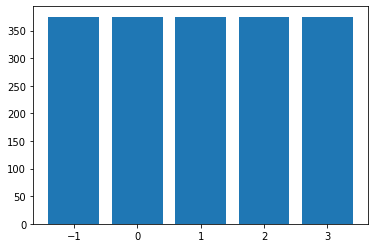

1873


In [22]:
val, count = np.unique(df["fold_12"], return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

## 8-class fold 

Total number:  [375 375 375 374 374]


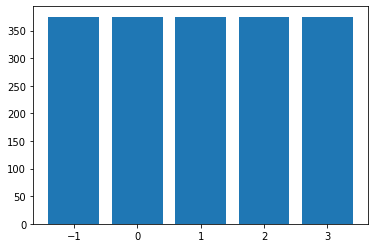

1873


In [23]:
val, count = np.unique(df["fold_8"], return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

## 6-Class fold

Total number:  [375 375 375 374 374]


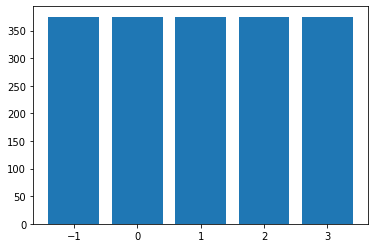

1873


In [24]:
val, count = np.unique(df["fold_6"], return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

# Sanity Check

## 12 Class

Total number:  [246 213  50  48  21   8   9 138 166  87  47  90]


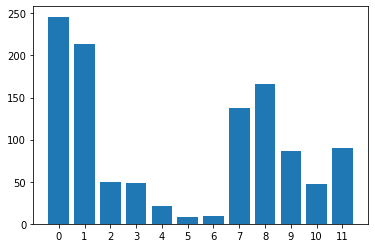

1123


In [25]:
tabular_data = pd.read_csv(new_csv)
ds_dict = utils.get_split_fold(tabular_data, label_col="labels_12", fold_col="fold_12", val_fold=0)
val, count = np.unique(ds_dict['train_ds']['labels'], return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

Total number:  [82 71 17 16  7  2  3 46 56 29 15 31]


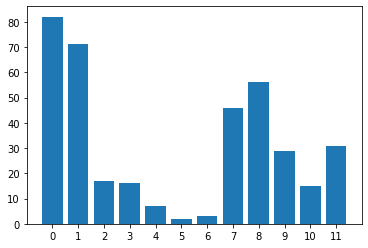

375


In [26]:
val, count = np.unique(ds_dict['val_ds']['labels'], return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

## 8 Class

Total number:  [246 213  50  69  17 138 253 137]


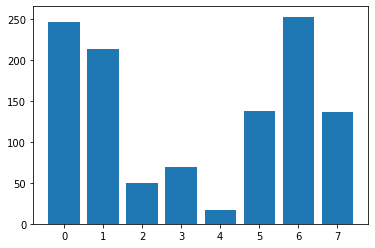

1123


In [27]:
tabular_data = pd.read_csv(new_csv)
ds_dict = utils.get_split_fold(tabular_data, label_col="labels_8", fold_col="fold_8", val_fold=0)
val, count = np.unique(ds_dict['train_ds']['labels'], return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

Total number:  [82 71 17 23  5 46 85 46]


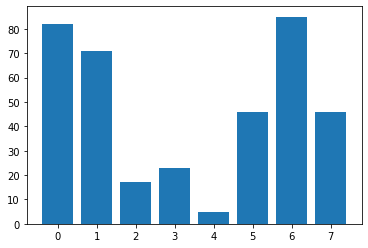

375


In [28]:
val, count = np.unique(ds_dict['val_ds']['labels'], return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

## 6 Class

Total number:  [246 213  50  84 138 392]


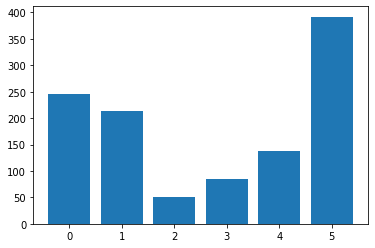

1123


In [29]:
tabular_data = pd.read_csv(new_csv)
ds_dict = utils.get_split_fold(tabular_data, label_col="labels_6", fold_col="fold_6", val_fold=0)
val, count = np.unique(ds_dict['train_ds']['labels'], return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))

Total number:  [ 82  71  17  29  46 130]


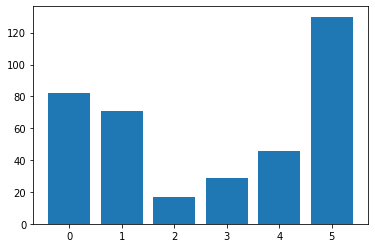

375


In [30]:
val, count = np.unique(ds_dict['val_ds']['labels'], return_counts=True)
print("Total number: ",count)
plt.bar(val, count)
plt.xticks(val)
plt.show()      
print(np.sum(count))